In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df_glass = pd.read_csv("glass.csv")
df_glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df_glass.shape

(214, 10)

In [5]:
# check null values
df_glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

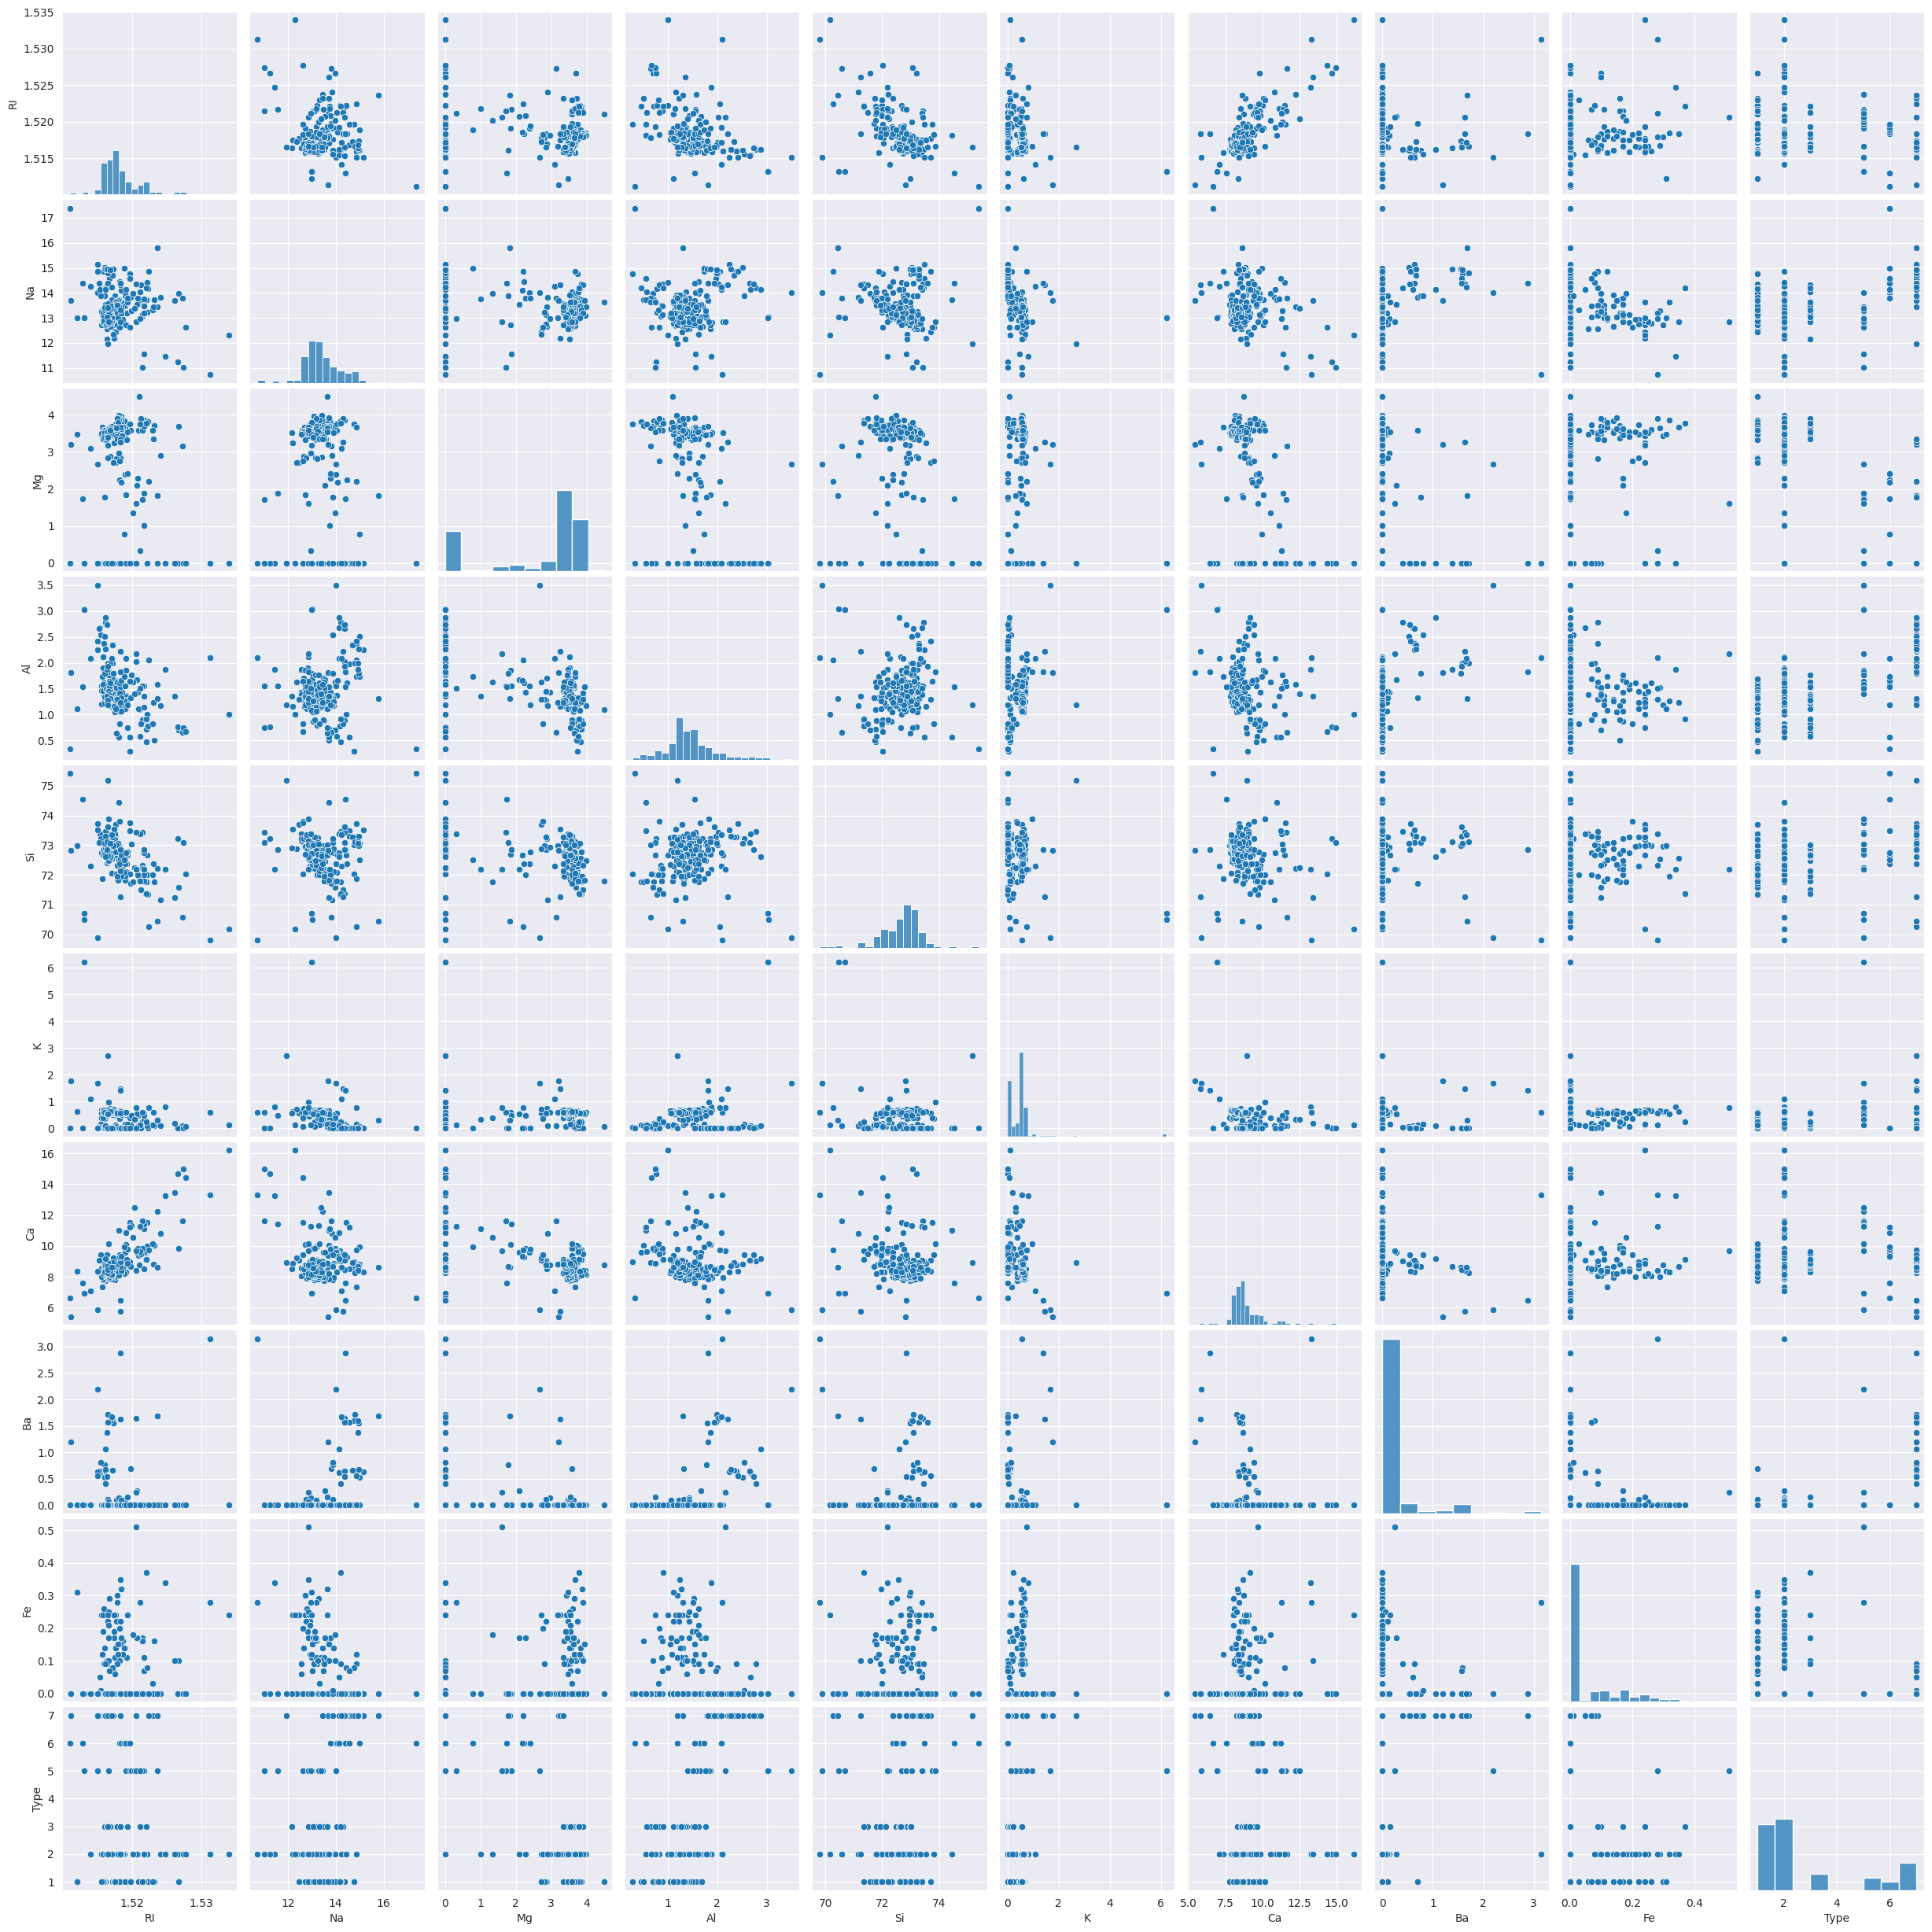

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(df_glass)

In [16]:
df_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,5
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,5
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,5
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,5


In [18]:
from pandas.core.frame import DataFrame
def remove_outliers(df_glass, column):
    Q1 = df_glass[column].quantile(0.25)
    Q3 = df_glass[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_glass = df_glass[(df_glass[column] >= lower_bound) & (df_glass[column] <= upper_bound)]
    return df_glass

# List of columns for which you want to remove outliers
columns_to_remove_outliers = ['RI',	'Na',	'Mg',	'Al',	'Si',	'K','Ca',	'Ba',	'Fe']

# Apply the outlier removal method to each column
for column in columns_to_remove_outliers:
    df_glass = remove_outliers(df_glass, column)


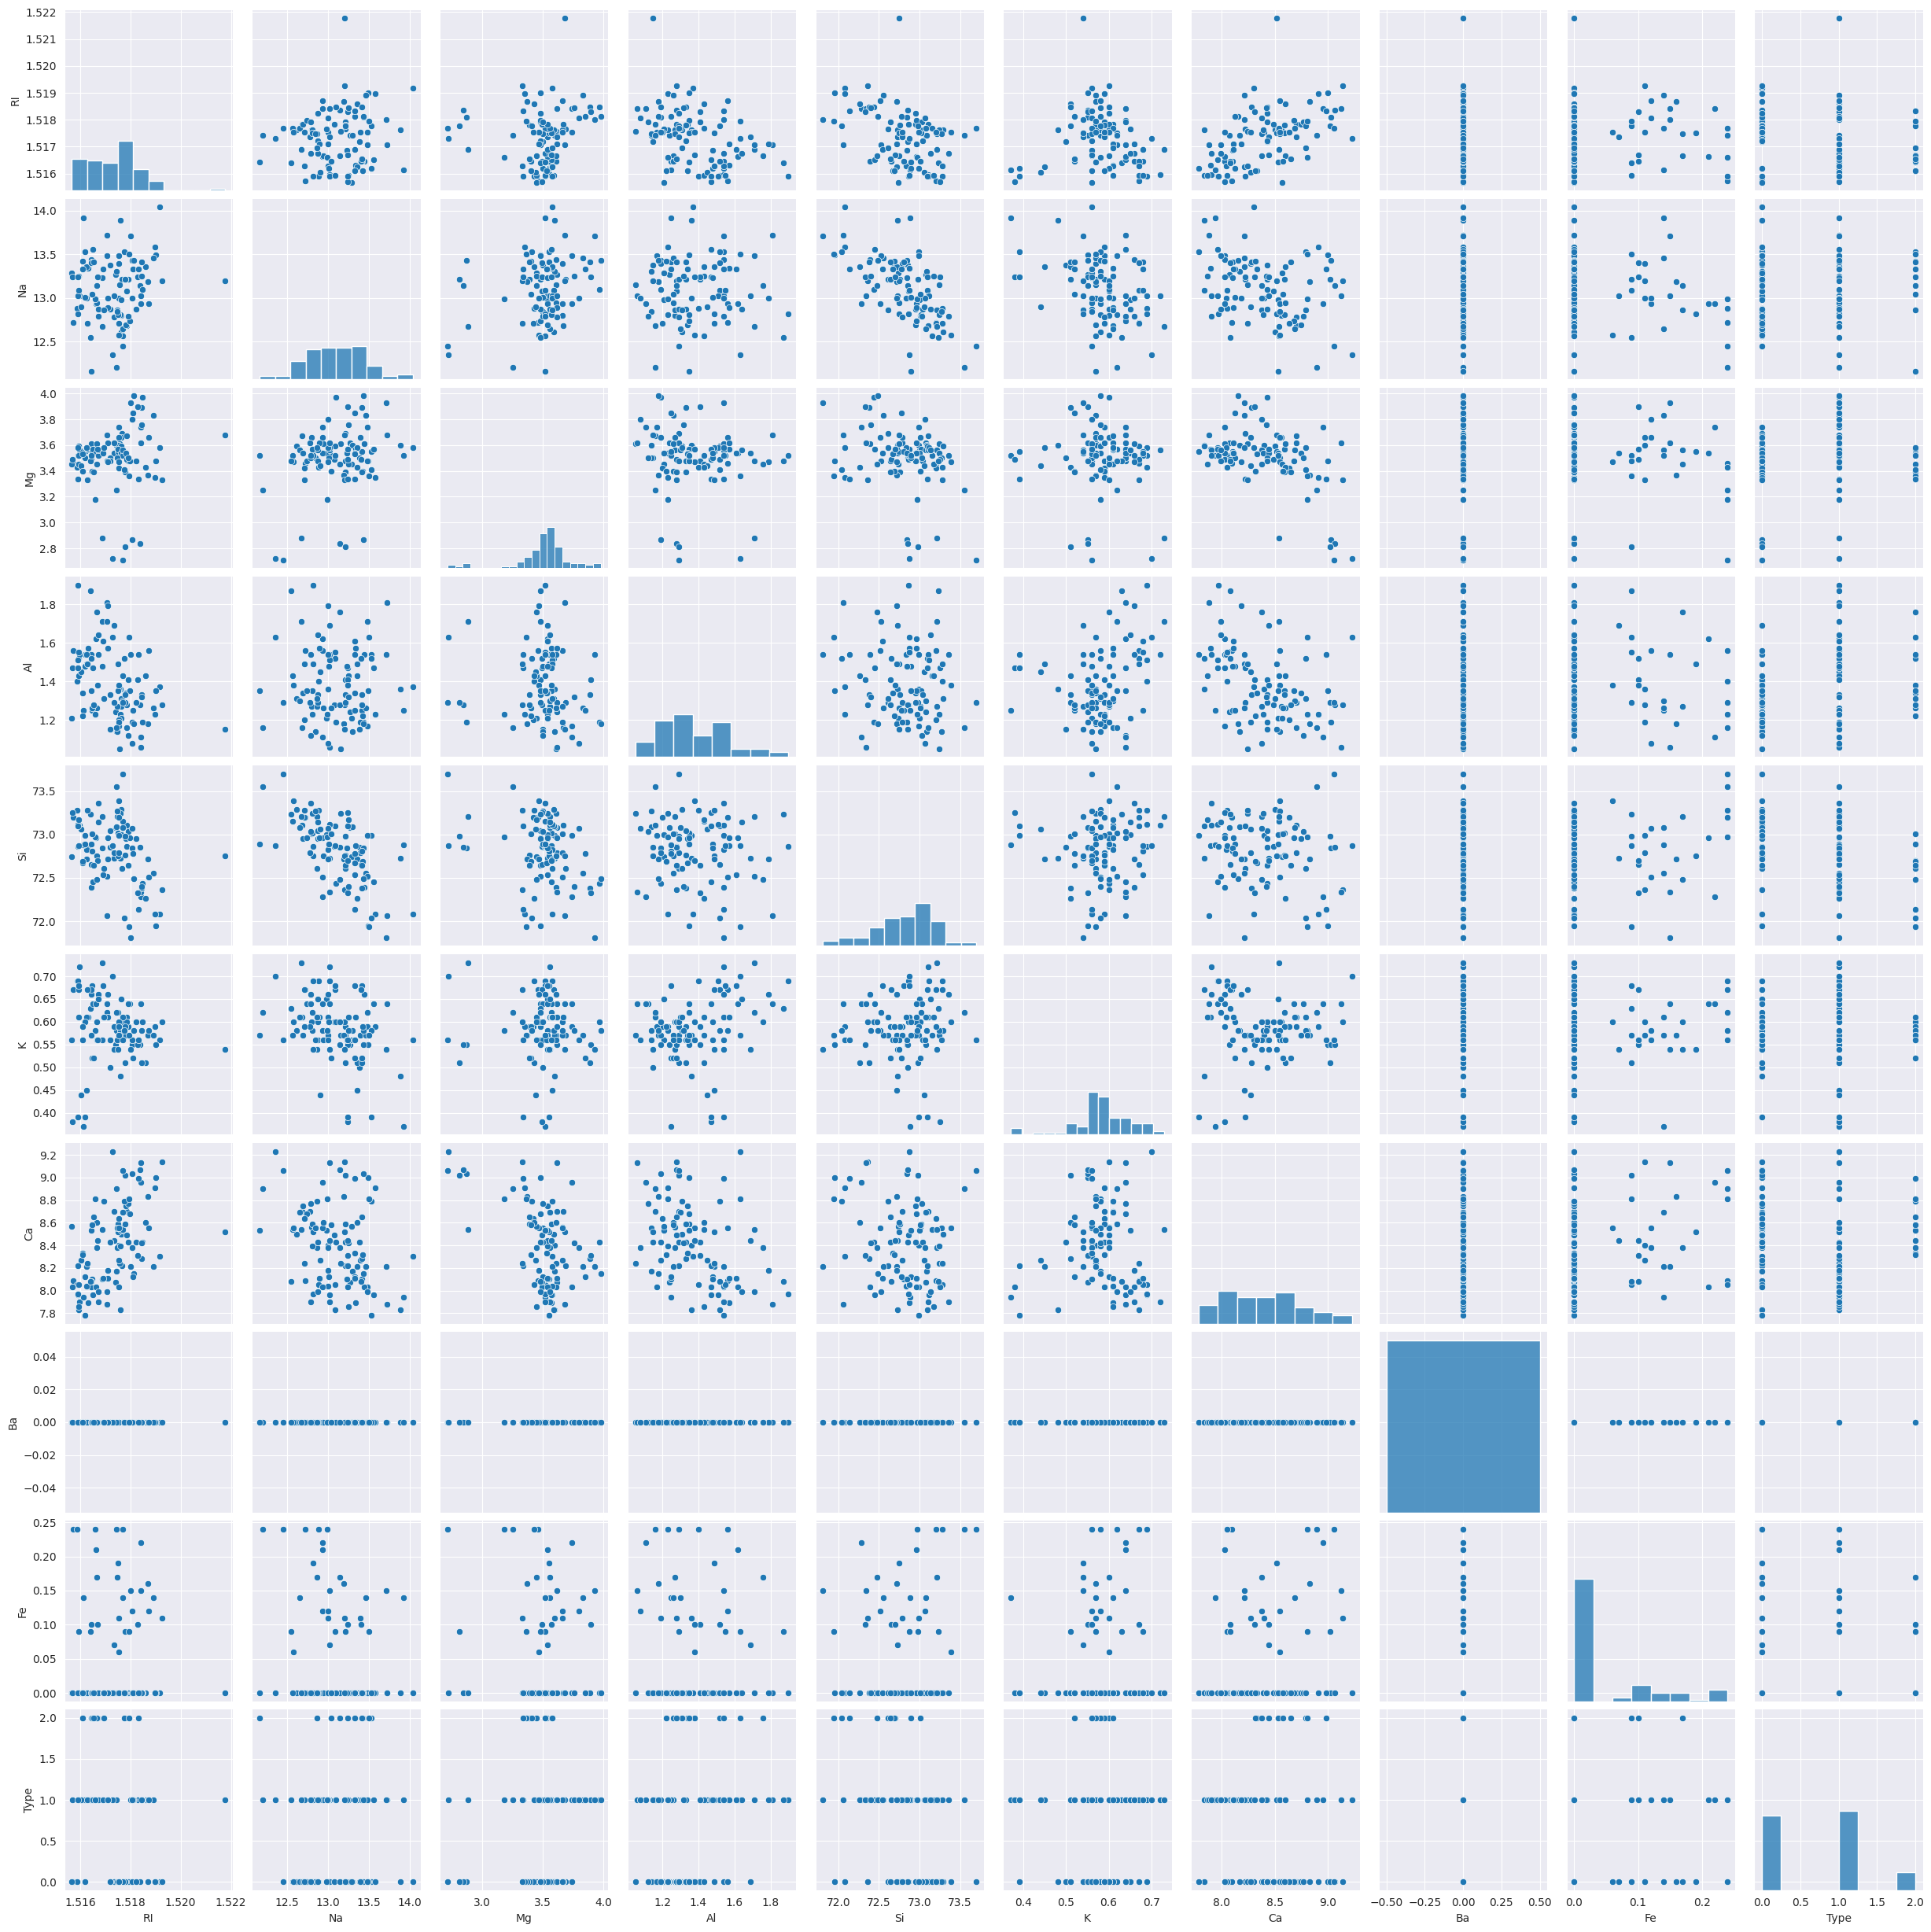

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(df_glass)

In [20]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_glass["Type"] = LE.fit_transform(df_glass["Type"])

Y = df_glass["Type"]
X = df_glass.iloc[:,1:9]

In [21]:
# data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=24)


In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.metrics import accuracy_score

# validation set method --> validaton hold-off method
training_accuracy = []
test_accuracy = []

for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    logreg.fit(X_train,Y_train) # Bo + b1x1 + B2x2
    Y_pred_train = logreg.predict(X_train)
    Y_pred_test = logreg.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [23]:
import numpy as np
print("Average trianing accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))

Average trianing accuray 0.69
Average test accuray 0.65


In [39]:
# lets us apply knn classifier for the data set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [40]:
knn.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

0.792
0.656


In [41]:
# validation set method --> validaton hold-off method
knn = KNeighborsClassifier(n_neighbors=5)

training_accuracy = []
test_accuracy = []

for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    knn.fit(X_train,Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))

import numpy as np
print("Average trianing accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))

# after trying with different k - values, we found that k = 7,9,11,13,15 we got similar accuracies, hence
# we are confirming that k=5 is best

Average trianing accuray 0.74
Average test accuray 0.65
